In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers
import random,cv2,os,glob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime as dt
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# face detection with mtcnn on a photograph
from keras.models import load_model
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from keras.utils.vis_utils import plot_model


In [2]:
path =r"F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set/*"
data_paths = os.path.join(path,'*g')
imagePaths = glob.glob(data_paths)

In [3]:
len(imagePaths)

15895

In [4]:

labels=[]
images=[]
detector = MTCNN()
i=0
for imgpath in imagePaths:
    print(imgpath)
    frame=cv2.imread(imgpath)
    faces = detector.detect_faces(frame)
    for result in faces:
        x, y, w, h= result['box']
        face_crop = frame[y:y+h,x:x+w]
        face_crop = cv2.resize(face_crop,(48,48))
        i=i+1
        #cv2.imwrite(str(i)+'.jpg',face_crop)
        img = face_crop.astype('float32')
        #face_crop = face_crop.reshape(1,face_crop.shape[0],face_crop.shape[1],1)
        img=cv2.resize(img,(48,48))
        images.append(img)
        label= imgpath.split(os.path.sep)[-2].split("_")
        labels.append(label)
    

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_0.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_10.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_100.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1000.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_101.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_102.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_103.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_104.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1045.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1046.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1047.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1127.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1128.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1129.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_113.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1130.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1131.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1132.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1133.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1134.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1135.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1136.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_11

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1215.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1216.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1217.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1218.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1219.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_122.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1220.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1221.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1222.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1223.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1224.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_12

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1304.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1305.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1306.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1307.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1308.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1309.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_131.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1310.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1311.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1312.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1313.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_13

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1393.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1394.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1395.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1396.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1397.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1398.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1399.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_14.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_140.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1400.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1401.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1402

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1482.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1483.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1484.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1485.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1486.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1487.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1488.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1489.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_149.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1490.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1491.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_14

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1570.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1571.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1572.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1573.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1574.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1575.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1576.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1577.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1578.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1579.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_158.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_15

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1659.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_166.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1660.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1661.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1662.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1663.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1664.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1665.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1666.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1667.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1668.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_16

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1747.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1748.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1749.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_175.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1750.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1751.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1752.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1753.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1754.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1755.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1756.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_17

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1835.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1836.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1837.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1838.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1839.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_184.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1840.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1841.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1842.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1843.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1844.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_18

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1923.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1924.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1925.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1926.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1927.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1928.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1929.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_193.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1930.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1931.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_1932.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_19

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2011.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2012.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2013.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2014.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2015.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2016.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2017.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2018.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2019.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_202.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2020.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_20

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_210.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2100.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2101.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2102.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2103.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2104.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2105.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2106.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2107.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2108.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2109.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_21

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_219.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2190.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2191.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2192.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2193.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2194.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2195.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2196.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2197.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2198.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2199.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_22

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2278.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2279.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_228.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2280.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2281.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2282.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2283.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2284.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2285.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2286.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2287.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_22

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2367.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2368.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2369.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_237.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2370.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2371.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2372.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2373.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2374.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2375.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2376.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_23

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2455.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2456.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2457.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2458.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2459.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_246.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2460.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2461.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2462.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2463.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2464.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_24

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2543.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2544.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2545.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2546.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2547.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2548.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2549.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_255.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2550.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2551.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2552.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_25

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2631.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2632.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2633.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2634.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2635.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2636.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2637.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2638.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2639.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_264.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2640.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_26

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_272.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2720.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2721.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2722.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2723.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2724.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2725.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2726.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2727.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2728.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2729.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_27

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2809.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_281.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2810.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2811.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2812.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2813.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2814.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2815.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2816.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2817.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2818.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_28

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2899.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_29.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_290.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2900.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2901.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2902.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2903.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2904.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2905.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2906.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2907.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2908

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2987.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2988.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2989.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_299.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2990.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2991.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2992.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2993.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2994.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2995.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_2996.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_29

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3075.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3076.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3077.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3078.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3079.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_308.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3080.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3081.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3082.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3083.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3084.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_30

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3164.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3165.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3166.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3167.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3168.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3169.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_317.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3170.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3171.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3172.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3173.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_31

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3253.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3254.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3255.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3256.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3257.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3258.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3259.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_326.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3260.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3261.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3262.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_32

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3342.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3343.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3344.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3345.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3346.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3347.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3348.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3349.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_335.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3350.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3351.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_33

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3431.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3432.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3433.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3434.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3435.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3436.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3437.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3438.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3439.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_344.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3440.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_34

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_352.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3520.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3521.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3522.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3523.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3524.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3525.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3526.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3527.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3528.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3529.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_35

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3608.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3609.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_361.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3610.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3611.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3612.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3613.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3614.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3615.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3616.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3617.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_36

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3698.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3699.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_37.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_370.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3700.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3701.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3702.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3703.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3704.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3705.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3706.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3707

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3786.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3787.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3788.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3789.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_379.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3790.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3791.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3792.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3793.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3794.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3795.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_37

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3874.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3875.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3876.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3877.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3878.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3879.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_388.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3880.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3881.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3882.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3883.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_38

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3963.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3964.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3965.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3966.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3967.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3968.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3969.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_397.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3970.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3971.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_3972.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_39

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_450.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_451.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_452.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_453.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_454.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_455.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_456.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_457.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_458.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_459.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_46.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_460.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_540.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_541.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_542.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_543.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_544.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_545.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_546.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_547.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_548.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_549.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_55.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_550.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_63.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_630.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_631.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_632.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_633.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_634.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_635.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_637.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_638.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_639.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_64.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_640.png
F:/Mun

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_723.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_724.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_725.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_726.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_727.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_728.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_729.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_73.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_730.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_731.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_732.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_733.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_814.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_815.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_816.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_817.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_818.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_819.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_82.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_820.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_821.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_822.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_823.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_824.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_906.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_907.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_908.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_909.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_91.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_910.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_911.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_912.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_913.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_914.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_916.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_917.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Anger\Anger_999.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_0.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_10.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_100.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1000.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_101.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1017.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1018.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1019.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_102.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1020.png
F:/M

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_110.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1100.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1101.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1102.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1103.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1104.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1105.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1106.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1107.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1108.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1109.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_11

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_119.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1190.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1191.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1192.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1193.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1194.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1195.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1196.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1197.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1198.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1199.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_12

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1278.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1279.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_128.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1280.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1281.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1282.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1283.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1284.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1285.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1286.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1287.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_12

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1366.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1367.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1368.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1369.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_137.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1370.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1371.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1372.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1373.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1374.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1375.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_13

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1455.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1456.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1457.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1458.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1459.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_146.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1460.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1461.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1462.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1463.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1464.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_14

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1543.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1544.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1545.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1546.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1547.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1548.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1549.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_155.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1550.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1551.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1552.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_15

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1632.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1633.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1634.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1635.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1636.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1637.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1638.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1639.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_164.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1640.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1641.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_16

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1721.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1722.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1723.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1724.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1725.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1726.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1727.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1728.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1729.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_173.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1730.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_17

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1810.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1811.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1812.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1813.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1814.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1815.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1816.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1817.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1818.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1819.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_182.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_18

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_190.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1900.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1901.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1902.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1903.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1904.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1905.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1906.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1907.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1908.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1909.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_19

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1989.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_199.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1990.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1991.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1992.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1993.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1994.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1995.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1996.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1997.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_1998.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_19

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2076.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2077.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2078.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2079.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_208.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2080.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2081.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2082.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2083.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2084.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2085.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_20

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2164.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2165.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2166.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2167.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2168.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2169.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_217.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2170.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2171.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2172.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2173.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_21

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2252.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2253.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2254.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2255.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2256.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2257.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2258.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2259.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_226.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2260.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2261.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_22

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2340.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2341.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2342.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2343.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2344.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2345.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2346.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2347.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2348.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2349.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_235.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_23

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2429.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_243.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2430.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2431.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2432.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2433.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2434.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2435.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2436.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2437.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2438.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_24

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2517.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2518.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2519.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_252.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2520.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2521.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2522.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2523.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2524.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2525.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2526.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_25

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2606.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2607.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2608.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2609.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_261.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2610.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2611.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2612.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2613.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2614.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2615.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_26

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2696.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2697.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2698.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2699.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_27.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_270.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2700.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2701.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2702.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2703.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2704.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2705

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2785.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2786.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2787.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2788.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2789.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_279.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2790.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2791.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2792.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2793.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2794.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_27

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2873.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2874.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2875.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2876.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2877.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2878.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2879.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_288.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2880.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2881.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2882.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_28

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2961.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2962.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2963.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2964.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2965.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2966.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2967.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2968.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2969.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_297.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_2970.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_29

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_305.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3050.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3051.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3052.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3053.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3054.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3055.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3056.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3057.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3058.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3059.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_30

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3139.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_314.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3140.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3141.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3142.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3143.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3144.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3145.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3146.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3147.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3148.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_31

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3228.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3229.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_323.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3230.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3231.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3232.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3233.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3234.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3235.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3236.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3237.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_32

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3317.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3318.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3319.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_332.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3320.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3321.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3322.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3323.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3324.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3325.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3326.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_33

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3405.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3406.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3407.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3408.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3409.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_341.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3410.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3411.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3412.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3413.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3414.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_34

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3494.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3495.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3496.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3497.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3498.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3499.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_35.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_350.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3500.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3501.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3502.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3503

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3583.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3584.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3585.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3586.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3587.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3588.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3589.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_359.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3590.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3591.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3592.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_35

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3671.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3672.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3673.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3674.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3675.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3676.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3677.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3678.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3679.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_368.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3680.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_36

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_376.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3760.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3761.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3762.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3763.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3764.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3765.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3766.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3767.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3768.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3769.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_37

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3849.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_385.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3850.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3851.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3852.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3853.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3854.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3855.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3856.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3857.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3858.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_38

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3938.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3939.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_394.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3940.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3941.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3942.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3943.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3944.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3945.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3946.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_3947.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_39

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_424.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_425.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_426.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_427.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_428.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_429.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_43.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_430.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_431.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_432.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_433.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_434.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_514.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_515.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_516.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_517.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_518.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_519.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_52.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_520.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_521.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_522.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_523.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_524.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_603.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_604.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_605.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_606.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_607.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_608.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_609.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_61.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_610.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_611.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_612.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_613.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_694.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_695.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_696.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_697.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_698.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_699.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_7.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_70.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_700.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_701.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_702.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_703.png
F:/Muns

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_783.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_784.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_785.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_786.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_787.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_788.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_789.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_79.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_790.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_791.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_792.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_793.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_872.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_873.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_874.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_875.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_876.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_877.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_878.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_879.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_88.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_880.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_881.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_882.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_962.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_963.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_964.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_965.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_966.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_967.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_968.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_969.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_97.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_970.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_971.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Happy\Happy_972.png
F:/Mu

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1062.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1063.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1064.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1065.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1066.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1067.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1068.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1069.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_107.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1070.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1071.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1148.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1149.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_115.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1150.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1151.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1152.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1153.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1154.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1155.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1156.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1157.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1232.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1233.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1234.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1235.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1236.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1237.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1238.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1239.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_124.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1240.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1241.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1318.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1319.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_132.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1320.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1321.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1322.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1323.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1324.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1325.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1326.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1327.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1402.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1403.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1404.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1405.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1406.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1407.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1408.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1409.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_141.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1410.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1411.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1489.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_149.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1490.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1491.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1492.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1493.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1494.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1495.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1496.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1497.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1498.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1574.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1575.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1576.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1577.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1578.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1579.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_158.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1580.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1581.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1582.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1583.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1659.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_166.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1660.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1661.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1662.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1663.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1664.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1665.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1666.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1667.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1668.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1743.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1744.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1745.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1746.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1747.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1748.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1749.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_175.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1750.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1751.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1752.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1828.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1829.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_183.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1830.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1831.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1832.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1833.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1834.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1835.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1836.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1837.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1913.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1914.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1915.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1916.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1917.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1918.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1919.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_192.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1920.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1921.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_1922.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_20.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_200.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2000.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2001.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2002.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2003.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2004.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2005.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2006.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2007.png
F:/Munsif/Munsif/Data/Fer2013/FER_Faci

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2084.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2085.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2086.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2087.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2088.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2089.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_209.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2090.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2091.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2092.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2093.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2169.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_217.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2170.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2171.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2172.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2173.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2174.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2175.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2176.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2177.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2178.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2253.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2254.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2255.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2256.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2257.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2258.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2259.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_226.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2260.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2261.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2262.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2338.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2339.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_234.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2340.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2341.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2342.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2343.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2344.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2345.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2346.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2347.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2422.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2423.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2424.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2425.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2426.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2427.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2428.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2429.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_243.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2430.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2431.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2507.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2508.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2509.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_251.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2510.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2511.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2512.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2513.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2514.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2515.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2516.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2592.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2593.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2594.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2595.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2596.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2597.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2598.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2599.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_26.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_260.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2600.png
F:/Munsif/Munsif/Data/Fer2013/FER_F

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2677.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2678.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2679.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_268.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2680.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2681.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2682.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2683.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2684.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2685.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2686.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2762.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2763.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2764.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2765.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2766.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2767.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2768.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2769.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_277.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2770.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2771.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2847.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2848.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2849.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_285.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2850.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2851.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2852.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2853.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2854.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2855.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2856.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2932.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2933.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2934.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2935.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2936.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2937.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2938.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2939.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_294.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2940.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_2941.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3016.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3017.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3018.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3019.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_302.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3020.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3021.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3022.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3023.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3024.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3025.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3101.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3102.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3103.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3104.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3105.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3106.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3107.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3108.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3109.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_311.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3110.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3187.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3188.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3189.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_319.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3190.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3191.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3192.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3193.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3194.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3195.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3196.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3272.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3273.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3274.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3275.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3276.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3277.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3278.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3279.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_328.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3280.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3281.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3357.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3358.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3359.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_336.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3360.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3361.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3362.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3363.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3364.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3365.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3366.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3442.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3443.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3444.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3445.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3446.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3447.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3448.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3449.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_345.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3450.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3451.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3527.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3528.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3529.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_353.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3530.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3531.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3532.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3533.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3534.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3535.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3536.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3612.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3613.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3614.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3615.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3616.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3617.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3618.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3619.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_362.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3620.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3621.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3699.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_37.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_370.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3700.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3701.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3702.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3703.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3704.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3705.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3706.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3707.png
F:/Munsif/Munsif/Data/Fer2013/FER_F

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3784.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3785.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3786.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3787.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3788.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3789.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_379.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3790.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3791.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3792.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3793.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3869.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_387.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3870.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3871.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3872.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3873.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3874.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3875.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3876.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3877.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3878.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3953.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3954.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3955.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3956.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3957.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3958.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3959.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_396.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3960.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3961.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_3962.png
F:/Munsif/Munsif/Data/Fer2013/FER

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_436.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_437.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_438.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_439.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_44.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_440.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_441.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_442.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_443.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_444.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_445.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Dat

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_522.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_523.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_524.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_525.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_526.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_527.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_528.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_529.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_53.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_530.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_531.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Dat

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_609.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_61.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_610.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_611.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_612.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_613.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_614.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_615.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_616.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_617.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_618.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Dat

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_696.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_697.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_698.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_699.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_7.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_70.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_700.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_701.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_702.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_703.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_704.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_781.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_782.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_783.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_784.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_785.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_786.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_787.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_788.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_789.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_79.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_790.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Dat

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_868.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_869.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_87.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_870.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_871.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_872.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_873.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_874.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_875.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_876.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_877.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Dat

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_954.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_955.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_956.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_957.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_958.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_959.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_96.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_960.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_961.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_962.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Neutral\Neutral_963.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Dat

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1057.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1058.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1059.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_106.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1060.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1061.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1062.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1063.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1064.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1065.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1066.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1067.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_115.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1150.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1151.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1152.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1153.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1154.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1155.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1156.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1157.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1158.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1159.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_116.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_D

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1242.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1243.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1244.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1245.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1246.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1247.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1248.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1249.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_125.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1250.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1251.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1252.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1335.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1336.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1337.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1338.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1339.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_134.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1340.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1341.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1342.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1343.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1344.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1345.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1428.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1429.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_143.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1430.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1431.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1432.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1433.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1434.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1435.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1436.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1437.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1438.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1520.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1521.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1522.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1523.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1524.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1525.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1526.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1527.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1528.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1529.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_153.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1530.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1614.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1615.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1616.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1617.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1618.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1619.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_162.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1620.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1621.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1622.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1623.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1624.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1707.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1708.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1709.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_171.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1710.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1711.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1712.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1713.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1714.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1715.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1716.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1717.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1800.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1801.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1802.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1803.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1804.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1805.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1806.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1807.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1808.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1809.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_181.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1810.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1895.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1896.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1897.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1898.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1899.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_19.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_190.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1900.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1901.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1902.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1903.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1904.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Da

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1988.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1989.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_199.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1990.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1991.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1992.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1993.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1994.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1995.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1996.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1997.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_1998.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2080.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2081.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2082.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2083.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2084.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2085.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2086.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2087.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2088.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2089.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_209.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2090.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2174.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2175.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2176.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2177.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2178.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2179.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_218.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2180.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2181.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2182.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2183.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2184.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2268.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2269.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_227.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2270.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2271.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2272.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2273.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2274.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2275.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2276.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2277.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2278.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2360.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2361.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2362.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2363.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2364.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2365.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2366.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2367.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2368.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2369.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_237.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2370.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2454.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2455.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2456.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2457.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2458.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2459.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_246.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2460.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2461.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2462.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2463.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2464.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2548.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2549.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_255.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2550.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2551.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2552.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2553.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2554.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2555.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2556.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2557.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2558.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2640.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2641.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2642.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2643.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2644.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2645.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2646.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2647.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2648.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2649.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_265.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2650.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2733.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2734.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2735.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2736.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2737.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2738.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2739.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_274.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2740.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2741.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2742.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2743.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2827.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2828.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2829.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_283.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2830.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2831.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2832.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2833.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2834.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2835.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2836.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2837.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2920.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2921.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2922.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2923.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2924.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2925.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2926.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2927.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2928.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2929.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_293.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_2930.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3012.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3013.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3014.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3015.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3016.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3017.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3018.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3019.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_302.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3020.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3021.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3022.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3106.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3107.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3108.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3109.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_311.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3110.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3111.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3112.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3113.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3114.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3115.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3116.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_32.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_320.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3200.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3201.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3202.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3203.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3204.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3205.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3206.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3207.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3208.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3209.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Da

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3293.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3294.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3295.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3296.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3297.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3298.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3299.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_33.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_330.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3300.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3301.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3302.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Da

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3387.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3388.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3389.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_339.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3390.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3391.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3392.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3393.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3394.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3395.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3396.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3397.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_348.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3480.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3481.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3482.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3483.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3484.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3485.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3486.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3487.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3488.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3489.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_349.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_D

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3572.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3573.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3574.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3575.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3576.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3577.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3578.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3579.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_358.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3580.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3581.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3582.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3666.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3667.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3668.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3669.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_367.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3670.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3671.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3672.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3673.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3674.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3675.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3676.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_376.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3760.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3761.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3762.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3763.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3764.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3765.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3766.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3767.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3768.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3769.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_377.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_D

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3853.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3854.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3855.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3856.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3857.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3858.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3859.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_386.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3860.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3861.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3862.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3863.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3946.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3947.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3948.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3949.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_395.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3950.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3951.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3952.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3953.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3954.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3955.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_3956.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_439.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_44.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_440.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_441.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_442.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_443.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_444.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_445.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_446.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_447.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_448.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_449.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_tra

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_533.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_534.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_535.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_536.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_537.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_538.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_539.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_54.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_540.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_541.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_542.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_543.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_tra

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_628.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_629.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_63.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_630.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_631.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_632.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_633.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_634.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_635.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_636.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_637.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_638.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_tra

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_721.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_722.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_723.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_724.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_725.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_726.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_727.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_728.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_729.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_73.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_730.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_731.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_tra

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_816.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_817.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_818.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_819.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_82.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_820.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_821.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_822.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_823.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_824.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_825.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_826.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_tra

F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_91.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_910.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_911.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_912.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_913.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_914.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_915.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_916.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_917.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_918.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_919.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_training_set\Sad\Sad_92.png
F:/Munsif/Munsif/Data/Fer2013/FER_Facial_Data/Fer_trai

In [5]:
images=np.array(images)
labels=np.array(labels)

In [6]:
print('shape of data:',images.shape)
print('shape of Labels:',labels.shape)

shape of data: (13222, 48, 48, 3)
shape of Labels: (13222, 1)


In [7]:
np.save('images', images)
np.save('labels', labels)

In [2]:
images = np.load('images224.npy')
print(images.shape)
labels = np.load('labels224.npy')
print(labels.shape)

(2344, 224, 224, 3)
(2344, 1)


In [3]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.1)

In [6]:
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")
#x_test.shape

x_train shape: (2109, 224, 224, 3) - y_train shape: (2109,)
x_test shape: (235, 224, 224, 3) - y_test shape: (235,)


In [12]:
num_classes = 4
input_shape = (224, 224, 3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 80
image_size = 224 # We'll resize input images to this size
patch_size = 24  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 16
mlp_head_units = [256, 256]  # Size of the dense layers of the final classifier


In [13]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.Normalization(),
        tf.keras.layers.experimental.preprocessing.Resizing(image_size, image_size),
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.06)
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [14]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [15]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    

Image size: 224 X 224
Patch size: 24 X 24
Patches per image: 81
Elements per patch: 1728


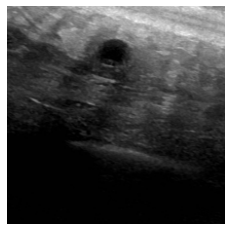

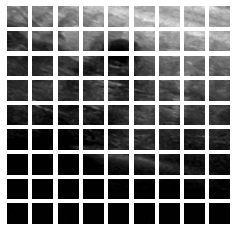

In [16]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [12]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [13]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.3)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [14]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        ],
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.4
    )


    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/80
56/56 [==============================] - 22s 151ms/step - loss: 1.6855 - accuracy: 0.2765 - val_loss: 1.3691 - val_accuracy: 0.3340
Epoch 2/80
56/56 [==============================] - 7s 124ms/step - loss: 1.3958 - accuracy: 0.2776 - val_loss: 1.3609 - val_accuracy: 0.3567
Epoch 3/80
56/56 [==============================] - 7s 124ms/step - loss: 1.3629 - accuracy: 0.3158 - val_loss: 1.3067 - val_accuracy: 0.3750
Epoch 4/80
56/56 [==============================] - 7s 123ms/step - loss: 1.3341 - accuracy: 0.3519 - val_loss: 1.2616 - val_accuracy: 0.4111
Epoch 5/80
56/56 [==============================] - 7s 123ms/step - loss: 1.3136 - accuracy: 0.3755 - val_loss: 1.2437 - val_accuracy: 0.4149
Epoch 6/80
56/56 [==============================] - 7s 125ms/step - loss: 1.2910 - accuracy: 0.3822 - val_loss: 1.2318 - val_accuracy: 0.4273
Epoch 7/80
56/56 [==============================] - 7s 124ms/step - loss: 1.2724 - accuracy: 0.4092 - val_loss: 1.2146 - val_accuracy: 0.4282
Epoch

In [15]:
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
data_augmentation (Sequential)  (None, 48, 48, 3)    7           input_1[0][0]                    
__________________________________________________________________________________________________
patches_1 (Patches)             (None, None, 1728)   0           data_augmentation[0][0]          
__________________________________________________________________________________________________
patch_encoder (PatchEncoder)    (None, 4, 64)        110912      patches_1[0][0]                  
______________________________________________________________________________________________

In [16]:
plot_model(vit_classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
# Save the Model.
vit_classifier.save('VIT')

INFO:tensorflow:Assets written to: VIT\assets


INFO:tensorflow:Assets written to: VIT\assets


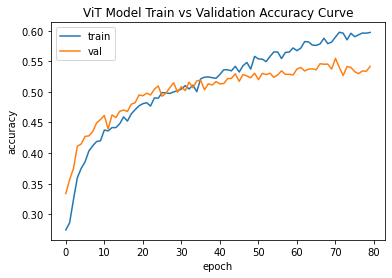

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ViT Model Train vs Validation Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

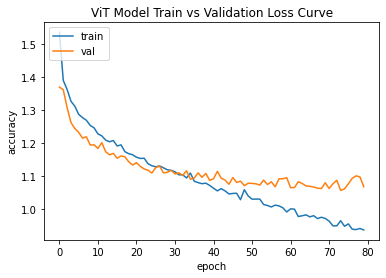

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ViT Model Train vs Validation Loss Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
model_evaluation_history = vit_classifier.evaluate(x_test, y_test)

42/42 [==============================] - 2s 42ms/step - loss: 1.0871 - accuracy: 0.5480


In [50]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
np.set_printoptions(precision=2)
class_names = ["Angry","Happy", "Neutral","Sad"]

from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
Y_pred = vit_classifier.predict_generator(x_test)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(X = y_pred, y_true=y_test, labels = class_names, normalize=False)

<ipython-input-50-e1ff411e6b62>:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = vit_classifier.predict_generator(x_test)


Confusion matrix, without normalization


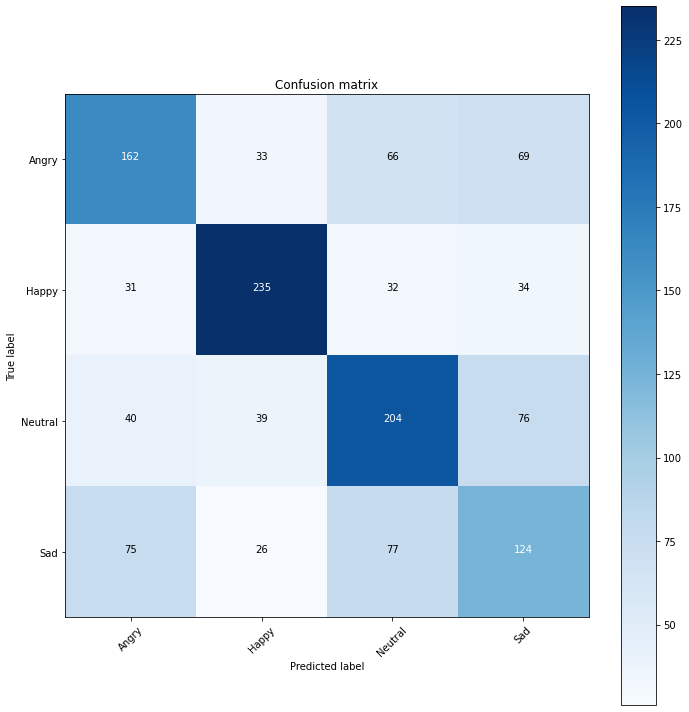

In [51]:
import matplotlib.pyplot as plt
import itertools 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, class_names)

# Testing

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51       330
           1       0.71      0.71      0.71       332
           2       0.54      0.57      0.55       359
           3       0.41      0.41      0.41       302

    accuracy                           0.55      1323
   macro avg       0.54      0.54      0.54      1323
weighted avg       0.55      0.55      0.55      1323



In [42]:
import keras

In [43]:
vit_classifier=keras.models.load_model(r"VIT_classifier___Date_Time_2022_01_29__20_16_18.h5")

OSError: No file or directory found at VIT_classifier___Date_Time_2022_01_29__20_16_18.h5

In [49]:
detector = MTCNN()

In [38]:
video_capture = cv2.VideoCapture(0)
while True:
    
    ret, frame = video_capture.read()
    frame2=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if ret==False:
        break
    #Converting to grayscale
    test_image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    
    font = cv2.FONT_HERSHEY_SIMPLEX
    faces = detector.detect_faces(frame)
    for result in faces:
        x, y, w, h = result['box']
        face_crop = test_image_gray[y:y+h,x:x+w]
        face_crop = cv2.resize(face_crop,(48,48))
        img = face_crop.astype('float32')
        face_crop = face_crop.reshape(1,face_crop.shape[0],face_crop.shape[1],1)
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)

        pred =vit_classifier.predict(face_crop)
        pred=np.argmax(pred)
        print(pred)
      
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),3)
        if pred==0:
            cv2.putText(frame,'Angry',(x,y), font, 1.5, (0,0,255), 2, cv2.LINE_AA)
            #cv2.imshow('',frame)
            cv2.imwrite('Angry.jpg',frame)q
        elif pred==1:
            cv2.putText(frame,'Happy',(x,y), font, 1.5, (0,255,0), 2, cv2.LINE_AA)
            #cv2.imshow('',frame)
            cv2.imwrite('Happy.jpg',frame)
        elif pred==2:
            cv2.putText(frame,'Neutral',(x,y), font, 1.5, (0,255,255), 2, cv2.LINE_AA)
           # cv2.imshow('',frame)
            cv2.imwrite('Neutral.jpg',frame)
        elif pred==3:
            cv2.putText(frame,'Sad',(x,y), font, 2, (255,0,255), 2, cv2.LINE_AA)
            #cv2.imshow('',frame)
            cv2.imwrite('Sad.jpg',frame)
        
        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cv2.waitKey(0)  
video_capture.release()
cv2.destroyAllWindows()


1
3
3
0
0
3
1
1
1
0
0
2
1
0
2
2
2
1
0
2
2
2
2
3
1
3
3
3
1
2
1
1
1
1
1
3
3
3
3
3
3
3
3
3
2
3
3
2
3
3
3
3
3
3
2
3
3
3
1
1
1
1
3
0
3
3
3
3
2
3
3
3
3
2
0
3
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
3
1
1
1
1
1
1
3
3
3
3
3
2
2
2
3
2
2
3
3
3
3
3
3
3
3
0
0
0
3
3
1
1
1
3
1
1
1
1
3
3
3
3
3
3
3
3
3
0
3
0
3
3
3
0
3
0
3
3
3
3
3
3
3
3
3
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
0
0
0
0
3
3
3
3
3
3
3
0
3
0
3
3
1
0
1
0
0
0
3
3
3
3
2
0
2
0
3
3
3
3
3
3
3
3
3
3
3
3
3
0
3
3
2
3
0
0
0
3
3
3
3
0
3
3
3
0
3
0
0
0
0
0
0
0
0
1
1
1
1
1
1
2
0
0
2
2
3
2
2
3
3
3
3
2
0
0
3
0
3
3
3
3
3
3
3
3
3
3
0
0
3
3
3
3
3
3
3
3
3
2
2
2
0
2
3
0
0
0
2
0
2
0
3
2
2
3
3
2
1
2
2
2
2
2
2
2
2
2
1
2
1
2
1
2
2
2
1
2
1
2
1
2
2
3
2
2
2
2
2
2
2
0
2
2
0
2
2
3
2
2
2
2
2
2
0
3
2
3
3
3
2
1
2
2
2
3
3
3
0
0
3
0
3
0
3
0
3
0
3
0
0
1
0
1
0
1
0
0
1
1
0
0
0
3
0
3
0
0
0
3
3
3
2
3
0
3
3
3
3
0
3
2
3
2
3
3
3
0
0
0
0
0
0
3
0
0
0
2
0
0
0
0
1
2
0
3
0
0
0
3
3
0
0
3
3
2
0
0
2
3
2
3
3
3
2
3
3
3
3
3
2
3
2
3
2
3
2
3
3
3
3
3
3
3
3
3
3


KeyboardInterrupt: 

In [55]:
import time
start_time=time.time()
haar_cascade_face = cv2.CascadeClassifier(r'haarcascade_frontalface_alt2.xml')
frame = cv2.imread(r"Neutral.jpg")

test_image_gray=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#Converting to grayscale
#test_image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


faces=haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
font = cv2.FONT_HERSHEY_SIMPLEX
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);
for (x, y, w, h) in faces:
    cv2.rectangle(test_image_gray, (x, y), (x+w, y+h), (0, 255, 0), 2,5)
    face_crop = test_image_gray[y:y+h,x:x+w]
    face_crop = cv2.resize(face_crop,(48,48))
    img = face_crop.astype('float32')
    face_crop = face_crop.reshape(1,face_crop.shape[0],face_crop.shape[1],3)

    pred =np.argmax(vit_classifier.predict(face_crop))
    print(pred)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),3)
    if pred==0:
        cv2.putText(frame,'Angry',(x,y), font, 1.5, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow('',frame)
        cv2.imwrite('Angry.jpg',frame)
    elif pred==1:
        cv2.putText(frame,'Happy',(x,y), font, 1.5, (0,255,0), 2, cv2.LINE_AA)
        cv2.imshow('',frame)
        cv2.imwrite('Happy.jpg',frame)
    elif pred==2:
        cv2.putText(frame,'Neutral',(x,y), font, 1.5, (0,255,255), 2, cv2.LINE_AA)
        cv2.imshow('',frame)
        cv2.imwrite('Neutral.jpg',frame)
    elif pred==3:
        cv2.putText(frame,'sad',(x,y), font, 2, (255,0,255), 2, cv2.LINE_AA)
        cv2.imshow('',frame)
        cv2.imwrite('sad.jpg',frame)
end_time=time.time()
total_time=end_time-start_time
print(total_time)
cv2.waitKey(0)  

cv2.destroyAllWindows()


2
0.22618722915649414
